In [48]:
import os

In [49]:
# filename list in the directory
dir_list = os.listdir()

# Get filename with extention ".ts"
videoname_list = [name for name in dir_list if name[-3:] == '.ts'and name[:4] == 'live'] # and (name[-4] == '5' or name[-4] == '0')]
videoname_list = sorted(videoname_list)
print(videoname_list[-10:])
print(len(videoname_list))

# Prepare text file for ffmpeg to concat videos
with open('video_list.txt','w') as file:
    for name in videoname_list:
        file.write(f"file '{name}'\n")


['live_20230102-073130.ts', 'live_20230102-073135.ts', 'live_20230102-073140.ts', 'live_20230102-073145.ts', 'live_20230102-073150.ts', 'live_20230102-073155.ts', 'live_20230102-073200.ts', 'live_20230102-073205.ts', 'live_20230102-073210.ts', 'live_20230102-073215.ts']
226


In [50]:
# Check missing stream's footage from filename's timeframe

# reformat filename to get the timeframe
tf_list = sorted([name[-9:-3] for name in videoname_list])
hr = (int(tf_list[0][:2]),int(tf_list[-1][:2]))
mi = (int(tf_list[0][2:4]),int(tf_list[-1][2:4]))
sec = (int(tf_list[0][4:]),int(tf_list[-1][4:]))
print(hr, mi, sec)

# Generate full timeframe which the original list supposed to have
gen_tf_list = []
h = hr[0]
mi_start = mi[0]
sec_start = sec[0]
check = True
while check:
    for i in range(mi_start,60):
        for j in range(sec_start,60,5):
            gen_tf_list.append(f'{h:02d}{i:02d}{j:02d}')
            if h == hr[1] and i == mi[1] and j == sec[1]:
                check = False
                break
        if check == False:
            break
        sec_start = 0
    if h == 24:
        h = 0
    else:
        h += 1
    mi_start = 0

# Compare generate list gen_tf_list with original list to see if there's missing timeframe recorded from the livestream
print(f'Difference in size between 2 lists: {len(tf_list)-len(gen_tf_list)}')
duplicated_check = [0] * len(gen_tf_list)
for i,tf1 in enumerate(gen_tf_list):
    for tf2 in tf_list:
        if tf1 == tf2:
            duplicated_check[i] = 1


(7, 7) (13, 32) (30, 15)
Difference in size between 2 lists: 0


# Missing Data Heatmap

226
225


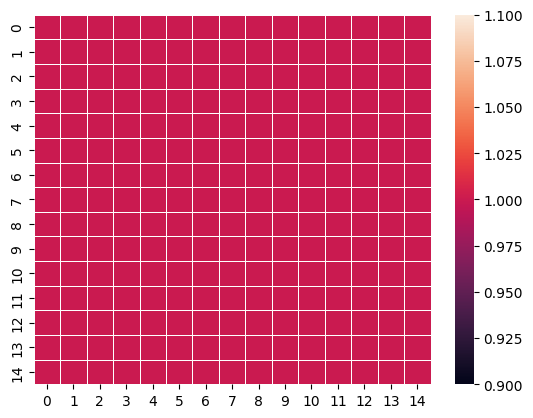

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

print(len(gen_tf_list))
line = int(math.sqrt(len(gen_tf_list)))
print(line**2)
temp_list = duplicated_check[:line**2]
tf_map = np.array(temp_list).reshape(line,line)
ax = sns.heatmap(tf_map, linewidth=0.5)
plt.show()

# Merge using ffmpeg

In [52]:
#@markdown  Whether to merge all small clips to a full video 
merge = True #@param {type:"boolean"}
if merge:
    !ffmpeg -y -f concat -safe 0 -i video_list.txt -c copy final_clip.ts

ffmpeg version 5.1.2-full_build-www.gyan.dev Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.1.0 (Rev2, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-libsnappy --enable-zlib --enable-librist --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-libbluray --enable-libcaca --enable-sdl2 --enable-libaribb24 --enable-libdav1d --enable-libdavs2 --enable-libuavs3d --enable-libzvbi --enable-librav1e --enable-libsvtav1 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs2 --enable-libxvid --enable-libaom --enable-libjxl --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-frei0r --enable-libfreetype --enable-libfribidi --enable-liblensfun --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --e